# Analyze and Predict School Project Funding on DonorsChoose.org

This exercise is based on a KDD 2014 project analyzing [DonorsChoose.org][1] data. DonorsChoose is an online charity where teachers can propose school projects that need funding, and people can make donations to these projects. When the project becomes fully funded, the school receives the material needed. 

The purpose of this exercise is the analyze the data provided by DonorsChoose, and try to determine which projects become fully funded using machine learning algorithms.

Data from https://www.kaggle.com/c/kdd-cup-2014-predicting-excitement-at-donors-choose/data


[1]: https://www.donorschoose.org/ "donorschoose"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import explore2
import preprocess2
import classify2
%matplotlib inline
%run explore2 
%run preprocess2
%run classify2 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', None) 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
donations = pd.read_csv('donations.csv')
outcomes = pd.read_csv('outcomes.csv')
projects = pd.read_csv('projects.csv')

## 1. Data Exploration
### Basic descriptive statistics and visualizations of the data

In [29]:
donations.head()

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,donation_total,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,431d720bc3dfd75ae445a5eaa0b0638d,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269.0,f,2011-08-25 14:27:34.807,42.50,7.50,50.00,10_to_100,t,no_cash_received,f,t,f,f,f,f,I gave to this project because I support the e...
1,fcfedba1c8a0ba77d280cace80a909f6,ffffac55ee02a49d1abc87ba6fc61135,521f1830a77c9dbbf8119d99c6206a16,NaN,GA,NaN,f,2011-11-04 07:54:21.552,26.83,4.73,31.56,10_to_100,t,creditcard,f,t,f,f,f,f,I donated because I want to support kids in Ge...
2,3fa95d29986aa6f401c6719ced3a3ce7,ffffac55ee02a49d1abc87ba6fc61135,1e0a63fc8141c7ba26b8b44ca0871b90,Rockville,MD,20853.0,f,2011-11-02 22:53:53.019,55.35,0.00,55.35,10_to_100,f,no_cash_received,t,f,f,f,t,f,The Spark's 'pet' projects include those which...
3,020ad6bd5e88a35741d23b5e08f8b8e8,ffffac55ee02a49d1abc87ba6fc61135,1d4acb508df29d5f1cc6d382969576cb,Salem,IN,47167.0,f,2011-11-03 23:54:01.109,8.50,1.50,10.00,10_to_100,t,paypal,f,f,f,f,f,f,I gave to this project because Education is im...
4,4b44b03f304d6425ae94446686f93cd6,ffffac55ee02a49d1abc87ba6fc61135,59c3c3cfcccc53ae855f7eee911c478b,anonymous,NaN,0.0,f,2011-11-02 23:21:00.043,20.00,0.00,20.00,10_to_100,f,no_cash_received,f,f,t,f,t,f,I lent a paw to help the children in this clas...


In [9]:
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,Selma Unified Sch District,Fresno,f,f,f,f,f,f,Mrs.,f,f,Literature & Writing,Literacy & Language,College & Career Prep,Applied Learning,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,Richardson Ind School District,Dallas,f,f,f,f,f,f,Mrs.,f,f,Literacy,Literacy & Language,ESL,Literacy & Language,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,Colton School District 53,Clackamas,f,f,f,f,f,f,Mr.,f,f,Literacy,Literacy & Language,Mathematics,Math & Science,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,f,f,f,f,Mr.,t,f,Social Sciences,History & Civics,Special Needs,Special Needs,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,f,f,f,f,Ms.,f,f,Mathematics,Math & Science,Literacy,Literacy & Language,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [11]:
outcomes.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


### Basic statistics of the continuous variables

In [32]:
bas_stat_don = explore2.basic_data_description(donations)
bas_stat_don

,donor_zip,donation_to_project,donation_optional_support,donation_total
count,1385927.00,3097989.00,3097989.00,3097989.00
mean,50664.94,65.95,10.73,76.68
std,33314.68,237.90,36.88,270.49
min,0.00,-12.75,-2.25,-15.00
25%,20003.00,10.00,1.50,10.00
50%,46714.00,21.25,3.75,25.00
75%,89521.00,50.00,7.50,56.11
max,99999.00,147204.00,21996.00,169200.00
median,46714.00,21.25,3.75,25.00


In [15]:
bas_stat_proj = explore2.basic_data_description(projects)
bas_stat_proj 

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,6.213620e+05,664098.00,664098.00,664094.00,629016.00,664098.00,664098.00,663952.00
mean,2.608577e+11,37.24,-93.34,52926.45,27.50,542.04,644.71,97.23
std,1.589754e+11,4.67,17.76,31193.74,8.66,12677.38,15458.63,2283.33
min,1.000050e+10,18.25,-176.63,410.00,9.00,0.00,0.00,0.00
25%,1.000230e+11,34.04,-112.00,27589.00,17.00,267.20,317.50,22.00
50%,2.615730e+11,37.66,-87.68,50702.00,30.00,411.00,487.84,30.00
75%,3.704720e+11,40.76,-79.19,85043.00,35.00,586.49,696.39,100.00
max,6.100009e+11,67.26,-66.63,99950.00,35.00,10250017.00,12500020.73,999999.00
median,2.615730e+11,37.66,-87.68,50702.00,30.00,411.00,487.84,30.00


In [17]:
bas_stat_out = explore2.basic_data_description(outcomes)
bas_stat_out

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,439487.00,524928.00,524928.00
mean,52.93,0.78,4.36
std,35.71,2.23,5.67
min,0.00,0.00,0.00
25%,25.00,0.00,1.00
50%,50.00,0.00,3.00
75%,83.00,0.00,5.00
max,100.00,151.00,304.00
median,50.00,0.00,3.00


### Merge datasets

In [13]:
merged = pd.merge(projects, outcomes, on='projectid', how='outer')
merged_df = pd.merge(merged, donations, on='projectid', how='outer')

In [29]:
merged_df.head(3)

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,donationid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,donation_total,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,Selma Unified Sch District,Fresno,f,f,f,f,f,f,Mrs.,f,f,Literature & Writing,Literacy & Language,College & Career Prep,Applied Learning,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,Richardson Ind School District,Dallas,f,f,f,f,f,f,Mrs.,f,f,Literacy,Literacy & Language,ESL,Literacy & Language,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,Colton School District 53,Clackamas,f,f,f,f,f,f,Mr.,f,f,Literacy,Literacy & Language,Mathematics,Math & Science,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Make column lists for distribution and bar graphs
full_col = merged_df.columns.tolist() 

# columns not to graph
not_graph = ['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid','school_latitude', 'school_longitude', \
             'school_city', 'school_zip','school_district', 'school_county','date_posted','donationid', \
             'donor_acctid', 'donor_city','donor_state', 'donor_zip','donation_timestamp','donation_message'] 

continuous_col0 = bas_stat_don.columns.tolist() + bas_stat_proj.columns.tolist() + bas_stat_out.columns.tolist()
continuous_col1 = [x for x in continuous_col0 if x not in not_graph] # continuous variables for distribution graph

categ_col0 = [x for x in full_col if x not in continuous_col1]
categ_col1 = [x for x in categ_col0 if x not in not_graph] # categorical/binary variables for bar graph

continuous_col1
categ_col1

['donation_to_project',
 'donation_optional_support',
 'donation_total',
 'fulfillment_labor_materials',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count']

['school_state',
 'school_metro',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'is_teacher_acct',
 'dollar_amount',
 'donation_included_optional_support',
 'payment_method',
 'payment_included_acct_credit',
 'payment_included_campaign_gift_card',
 'payment_included_web_purchased_gift_card',
 'payment_was_promo_matched',
 'via_giving_page',
 'for_honoree',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor']

### Histograms of continuous variables

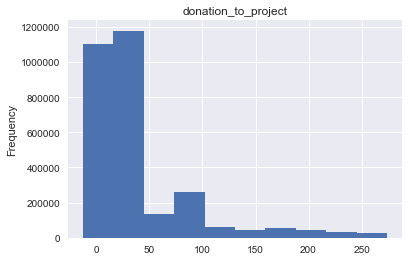

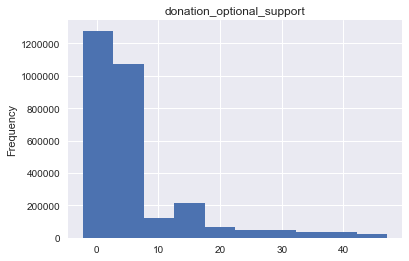

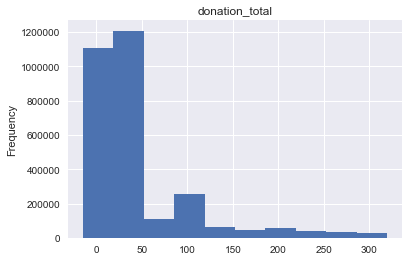

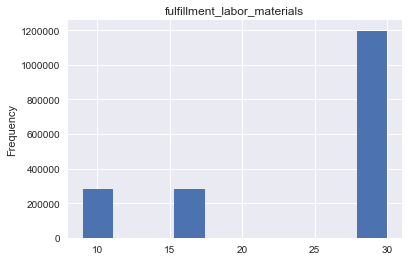

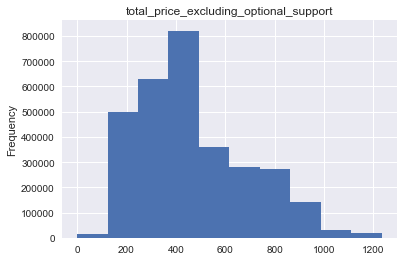

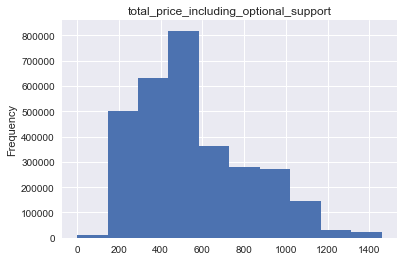

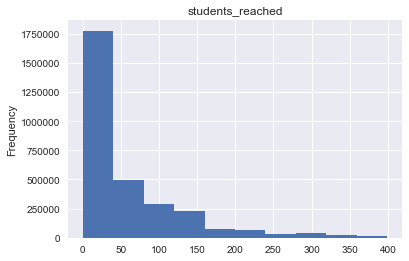

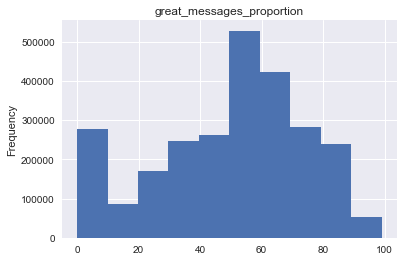

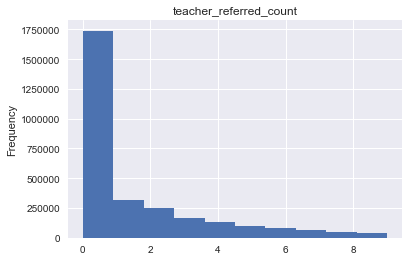

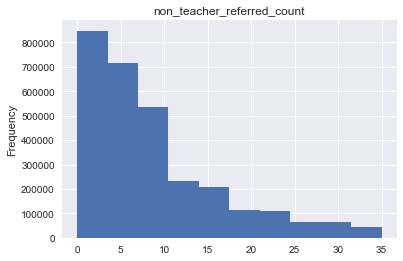

In [34]:
# For each variable: the distribution of the bottom 95% is plotted because some of the data is very skewed
explore2.make_histograms(merged_df, continuous_col1, .95)

### Bar graphs of categorical / binary variables

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


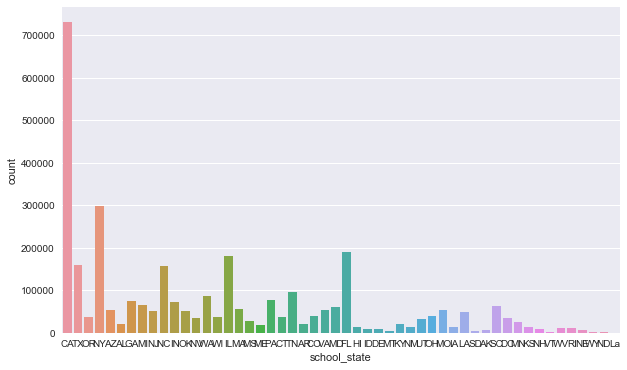

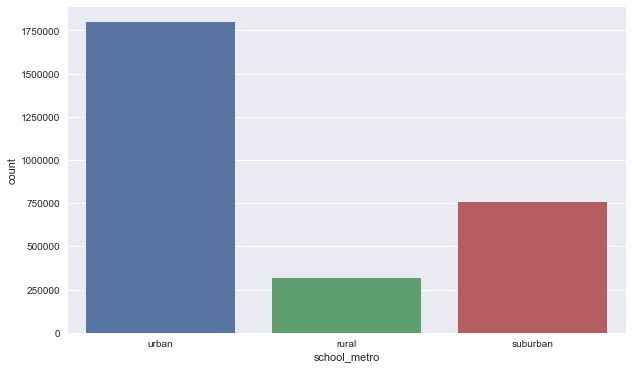

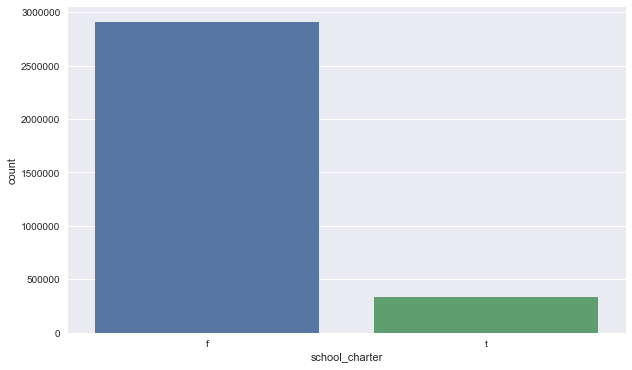

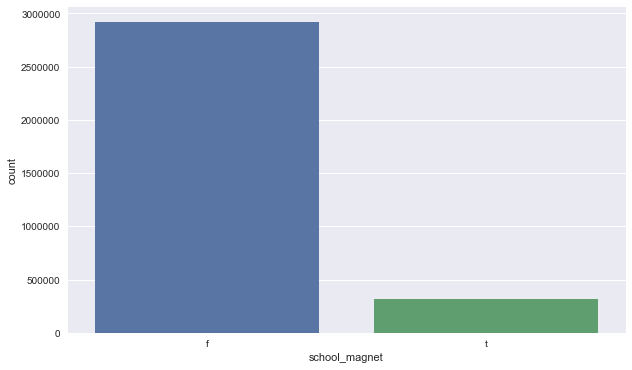

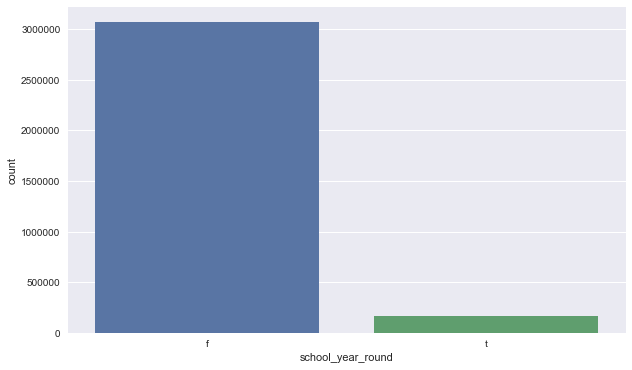

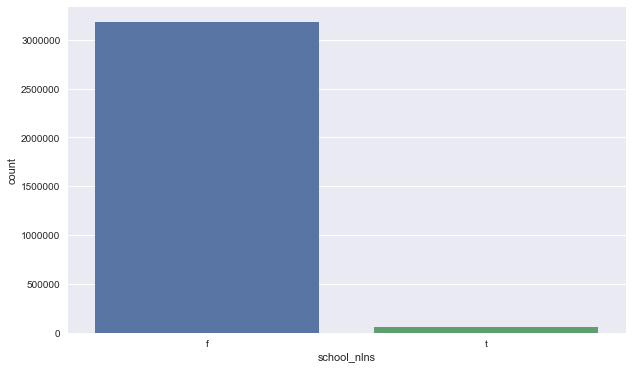

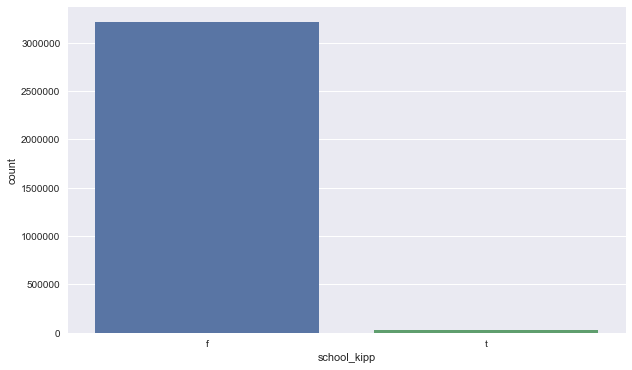

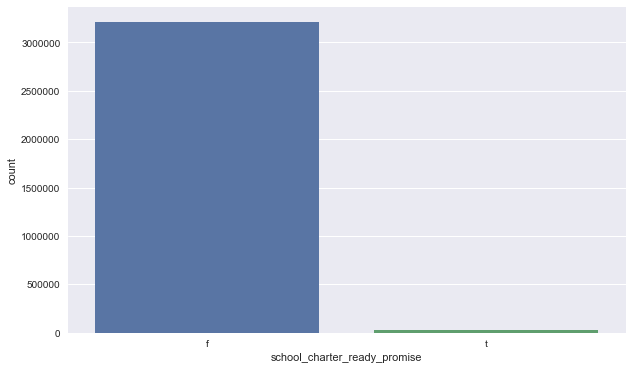

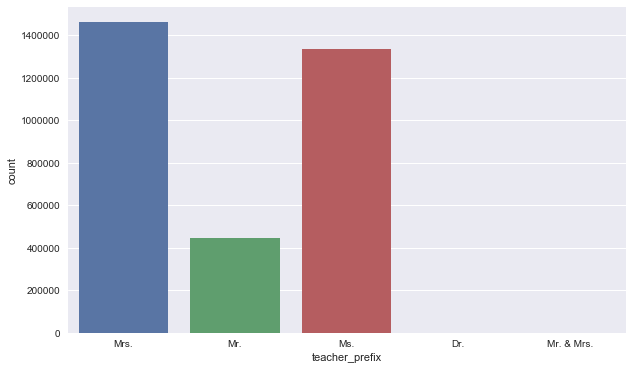

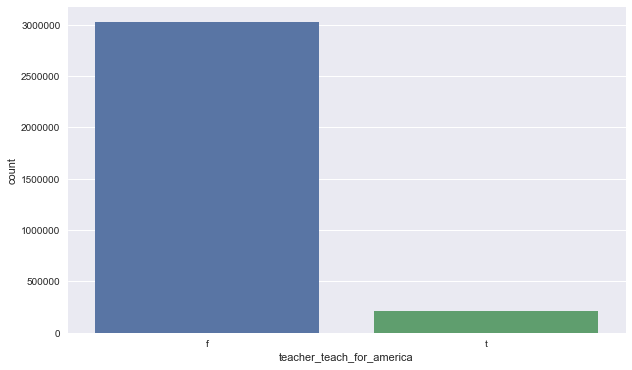

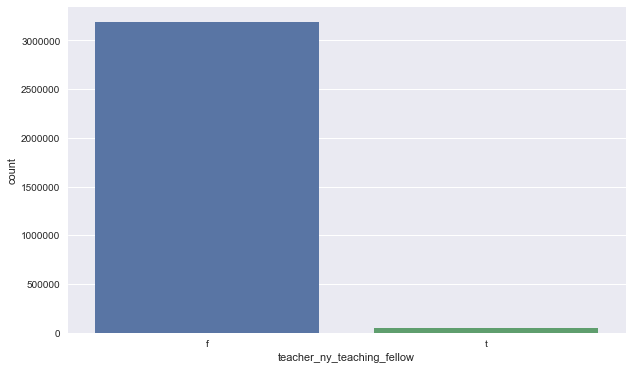

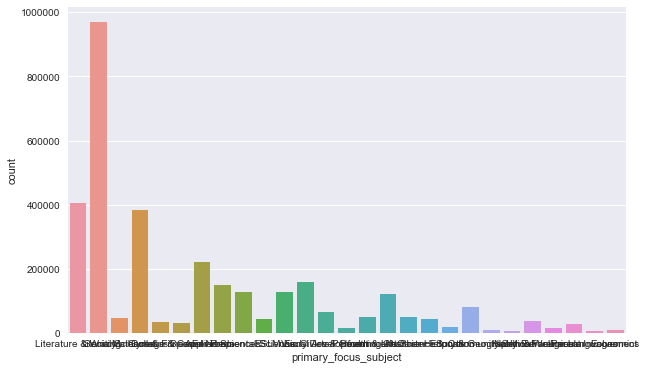

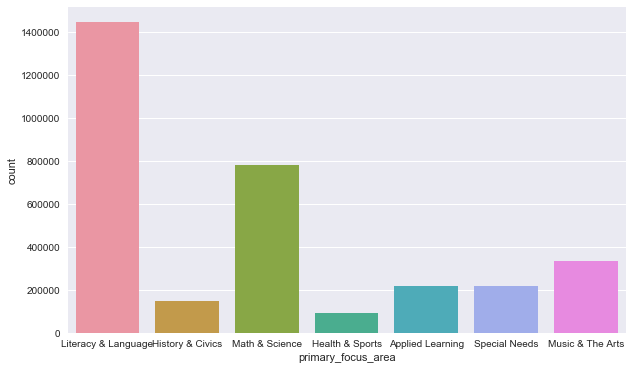

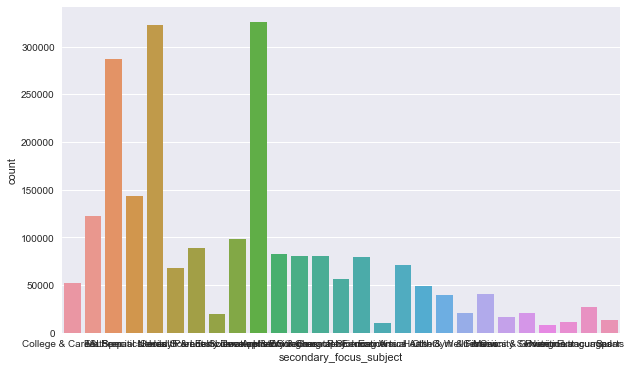

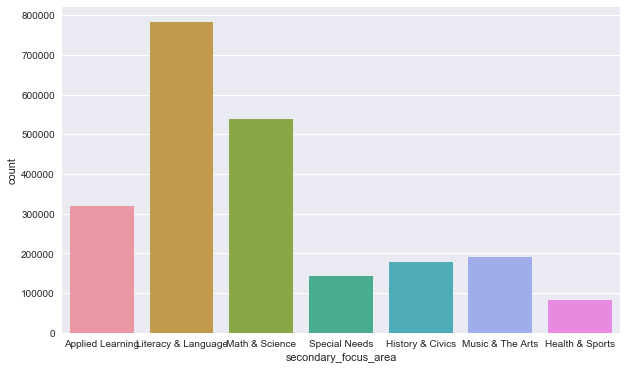

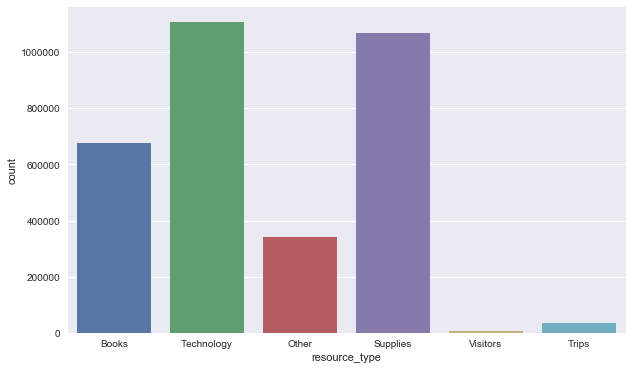

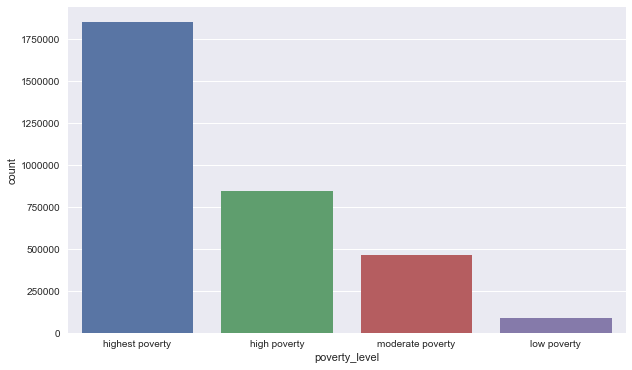

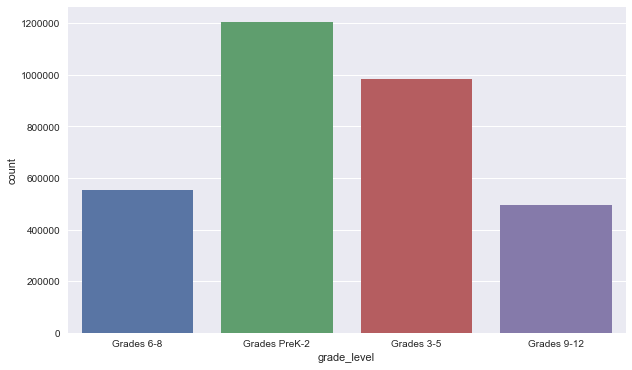

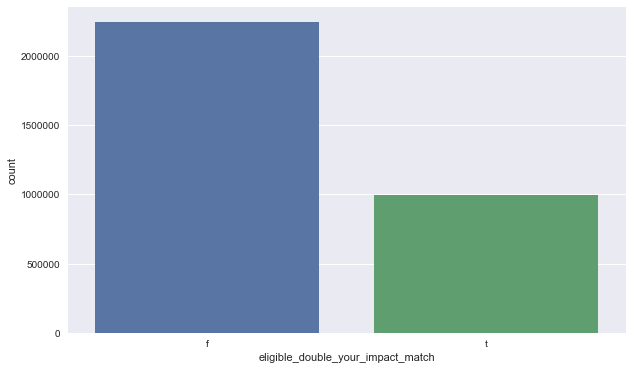

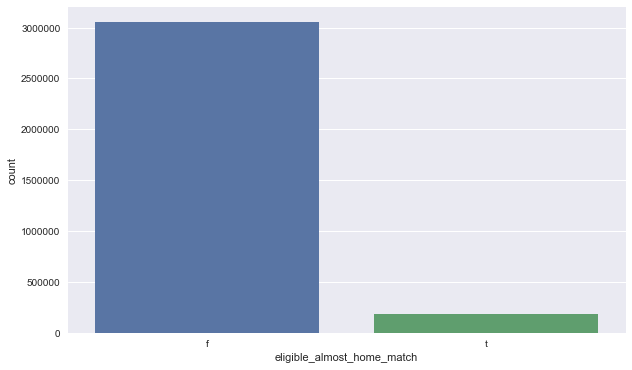

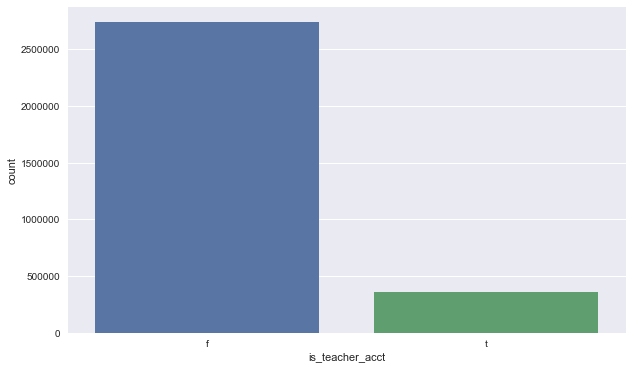

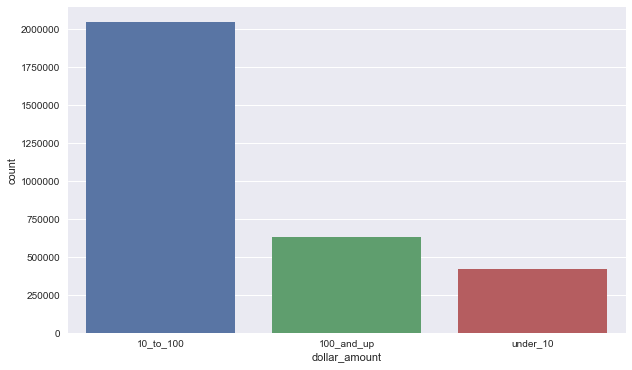

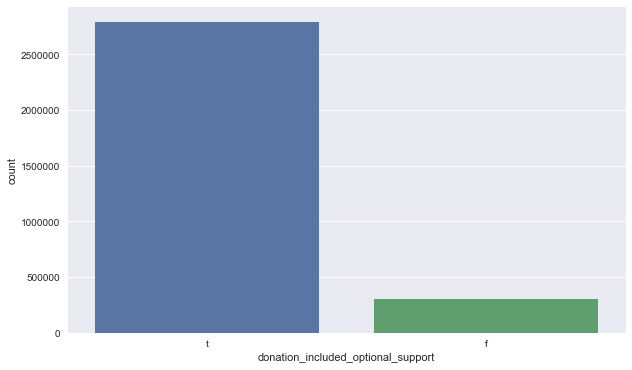

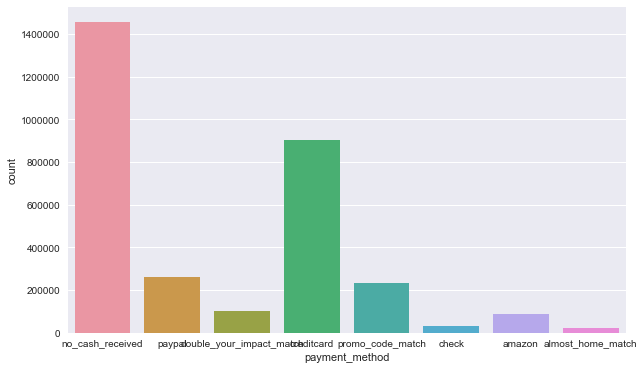

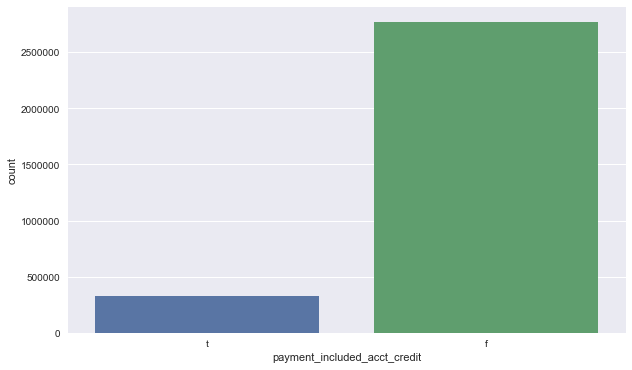

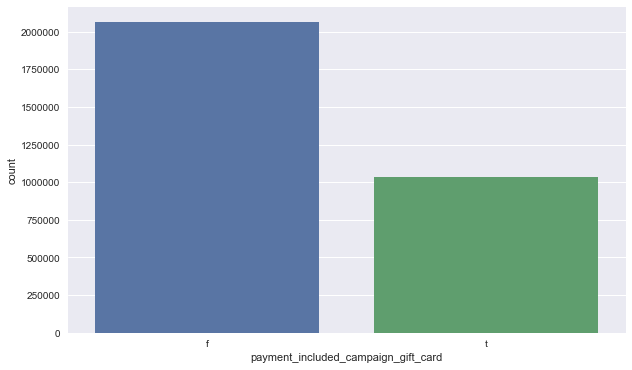

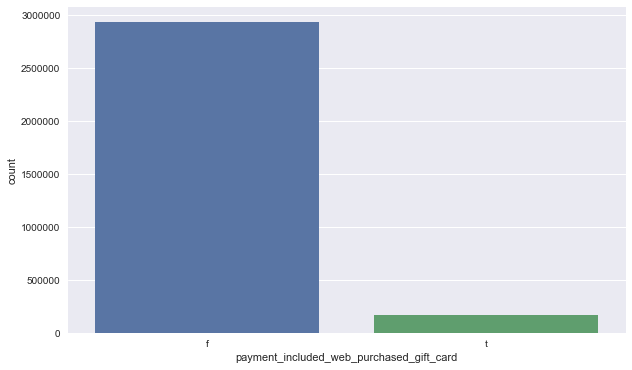

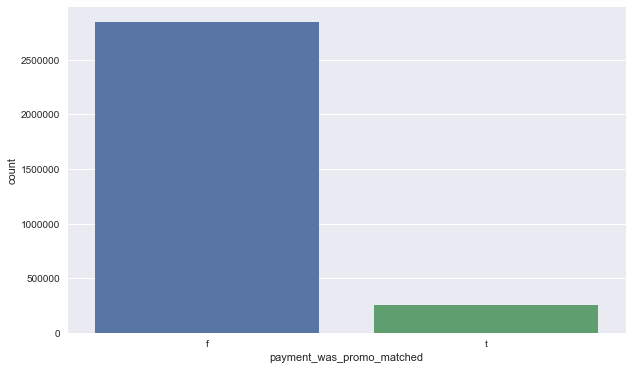

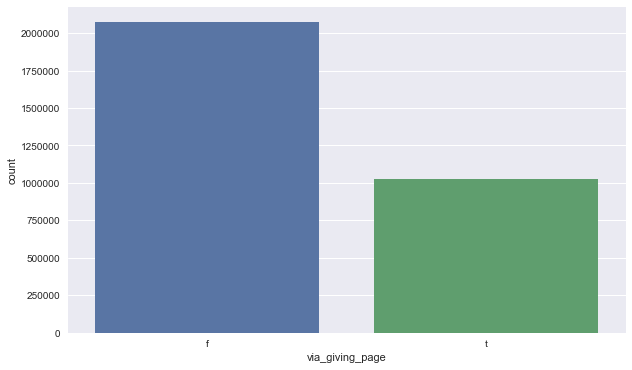

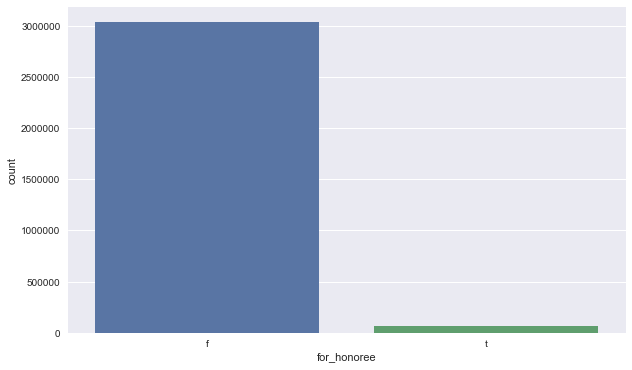

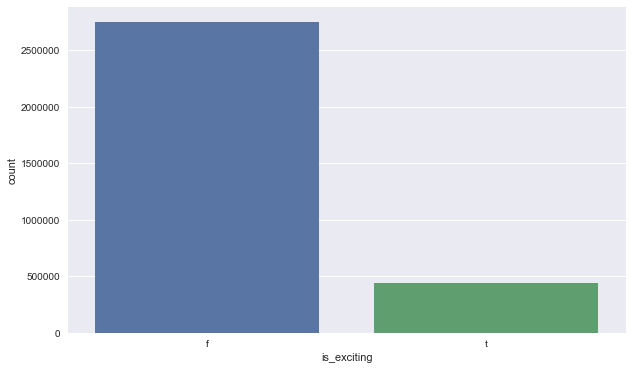

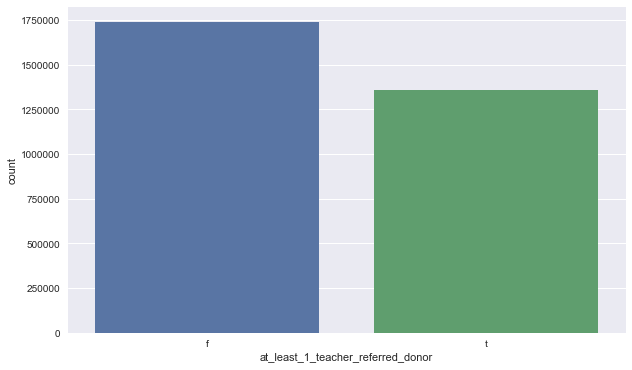

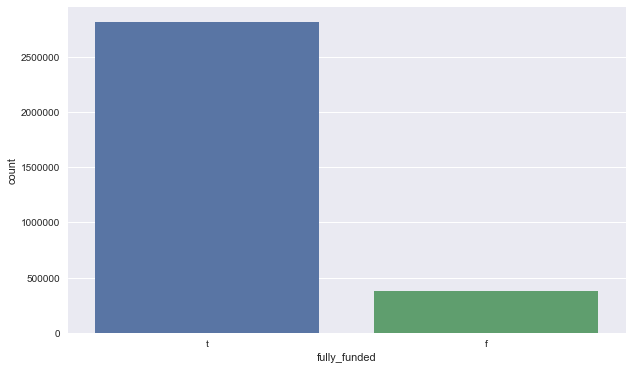

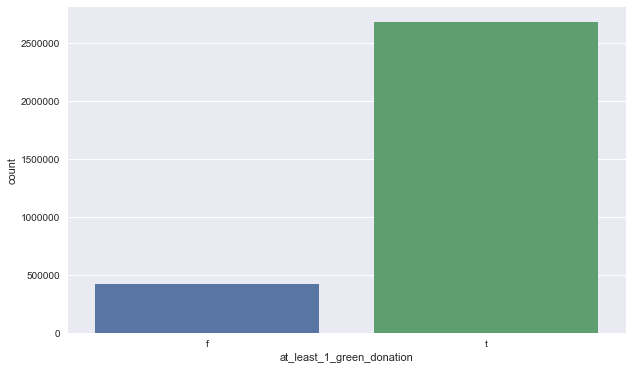

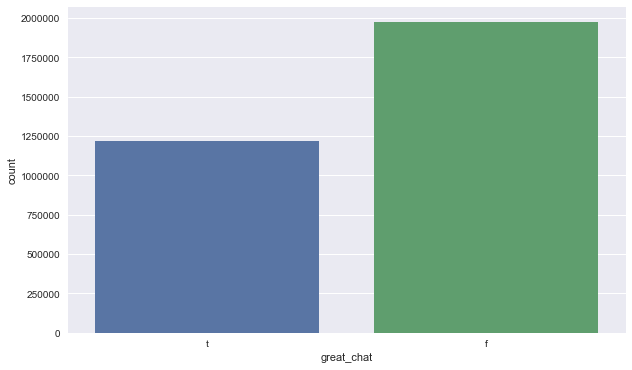

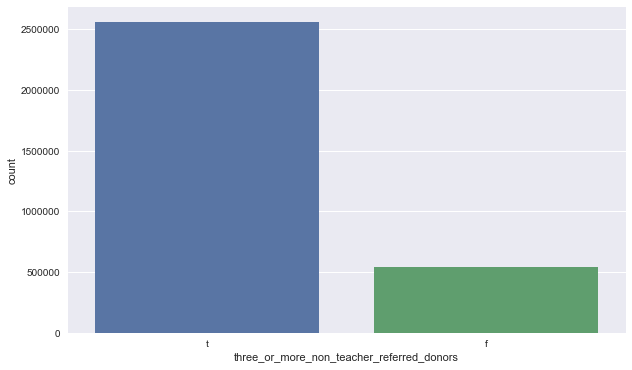

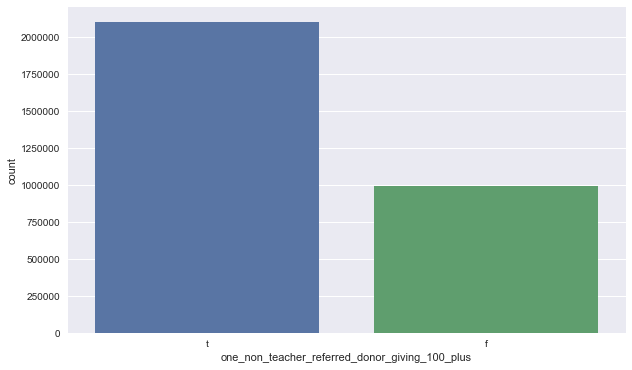

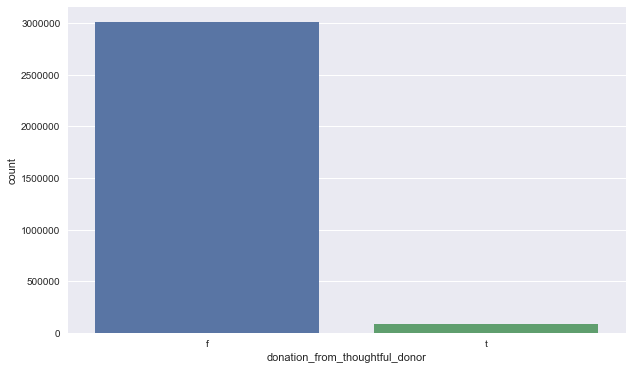

In [35]:
# Bar graphs made intentionally very large to capture nuances of variables with many categories
explore2.make_bargraphs(merged_df, categ_col1, (10,6))

### Disaggregated boxplots

In [17]:
# List of variables to disaggregate boxplots by
categ_col2 = ['school_metro','school_charter','teacher_prefix','primary_focus_area','resource_type','poverty_level',
              'grade_level','eligible_double_your_impact_match','eligible_almost_home_match','payment_was_promo_matched',
              'payment_method','is_exciting', 'fully_funded', 'at_least_1_teacher_referred_donor',
              'three_or_more_non_teacher_referred_donors','great_chat','donation_from_thoughtful_donor']

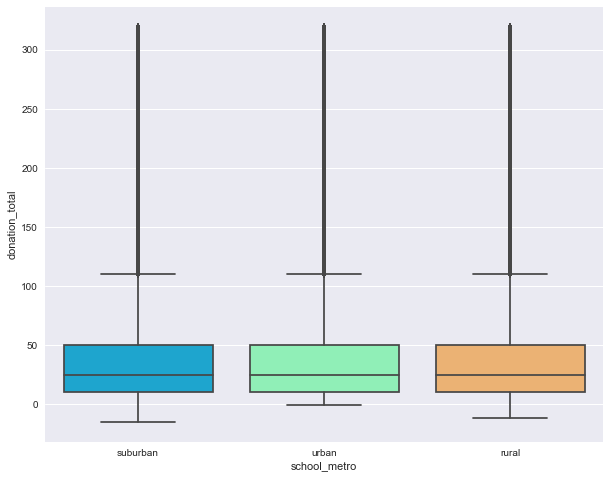

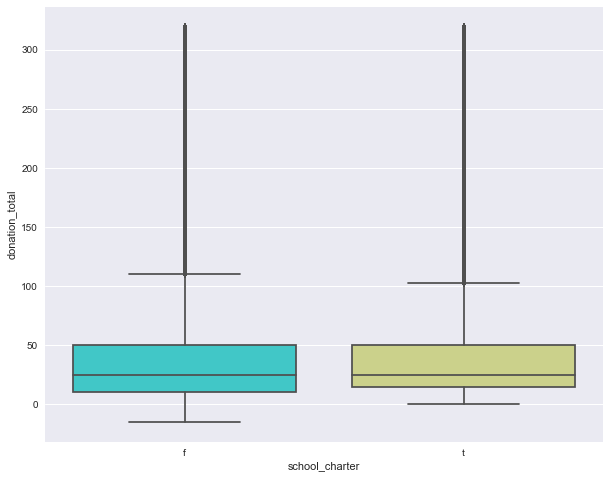

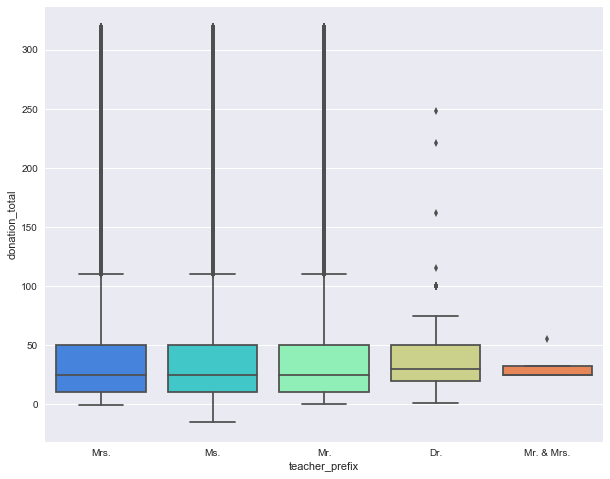

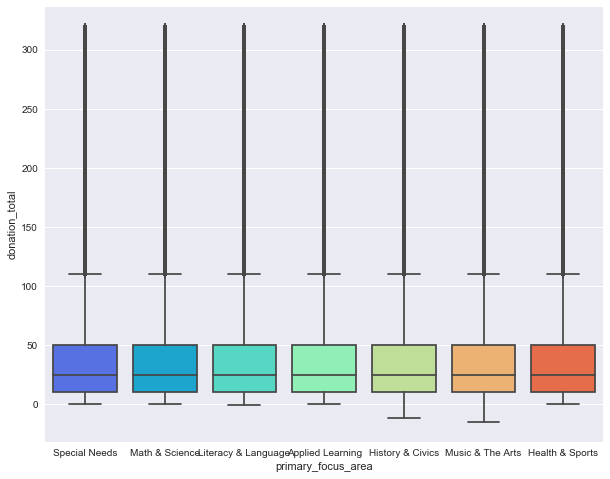

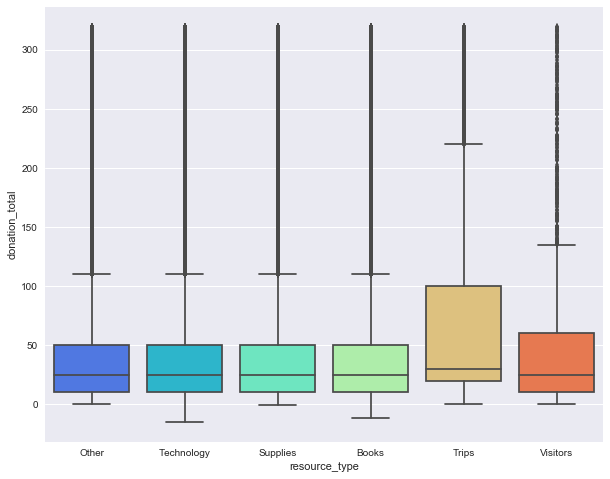

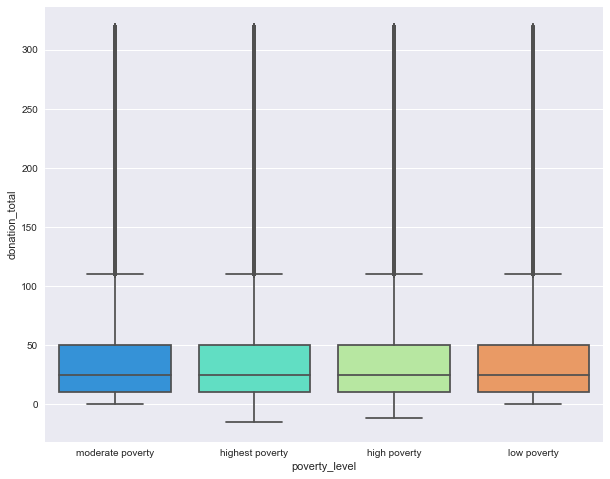

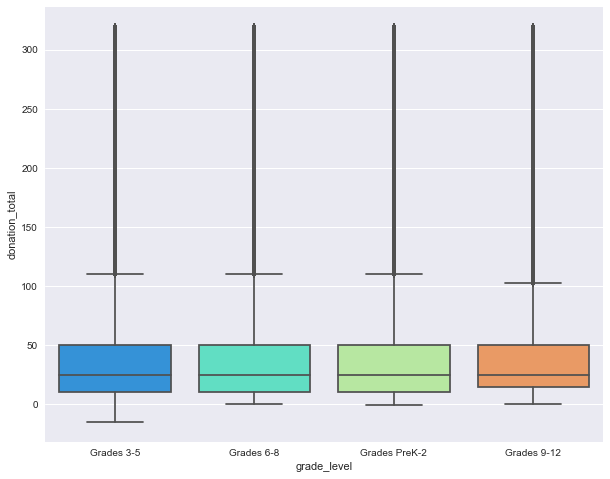

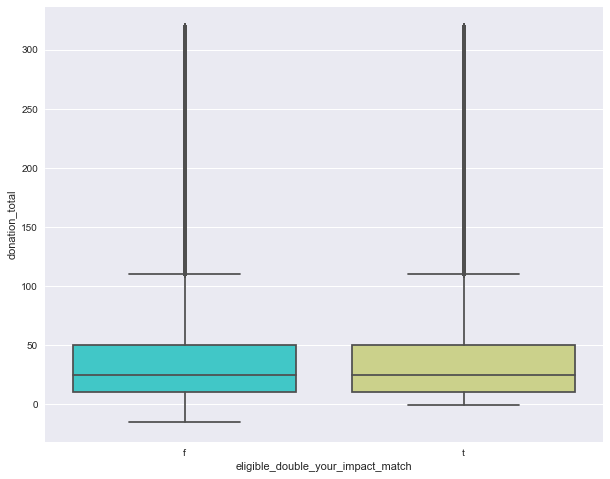

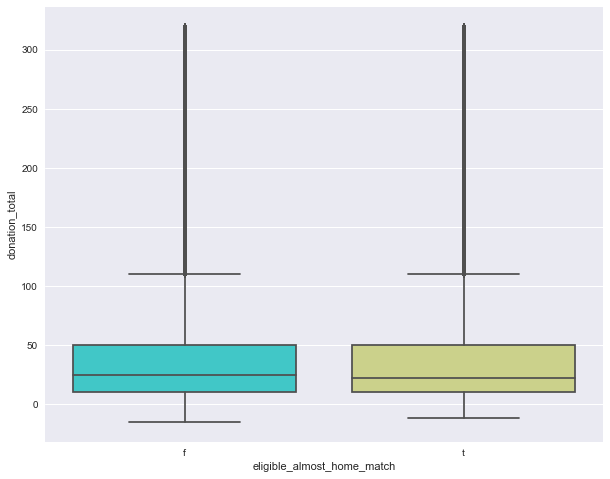

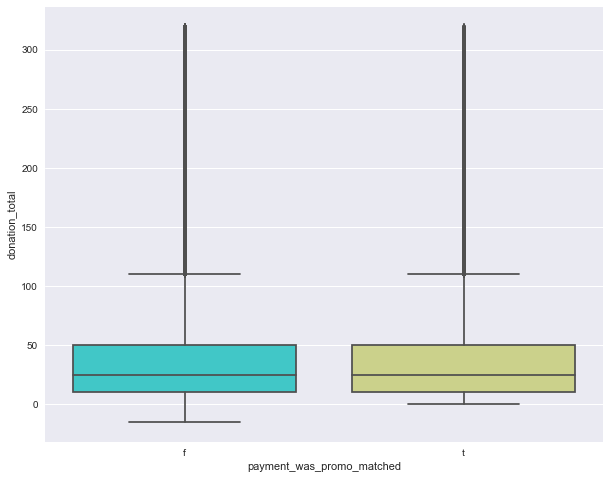

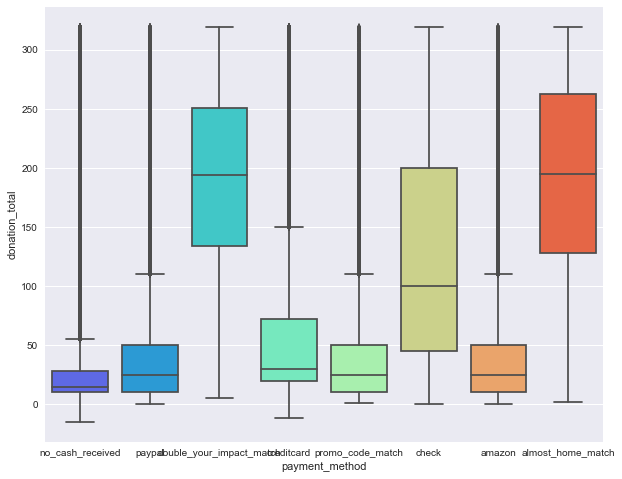

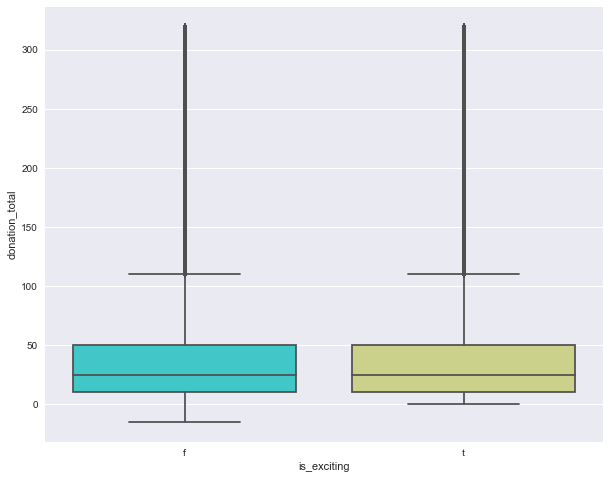

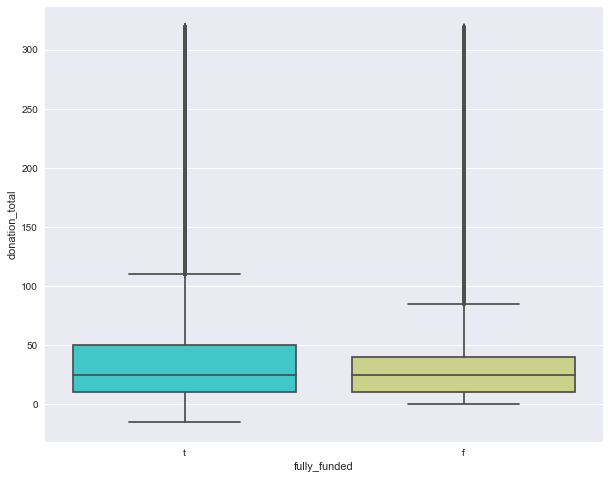

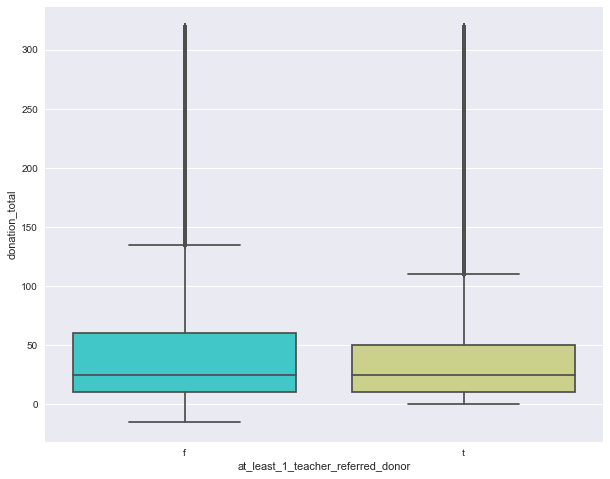

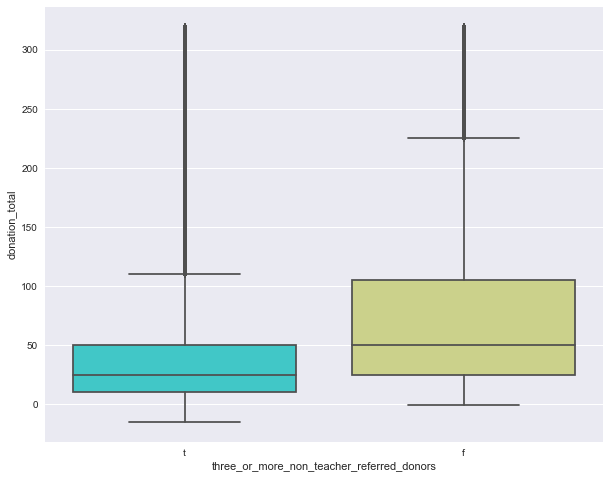

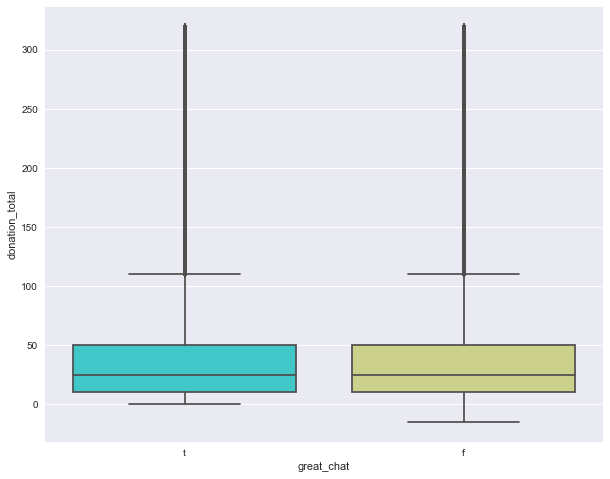

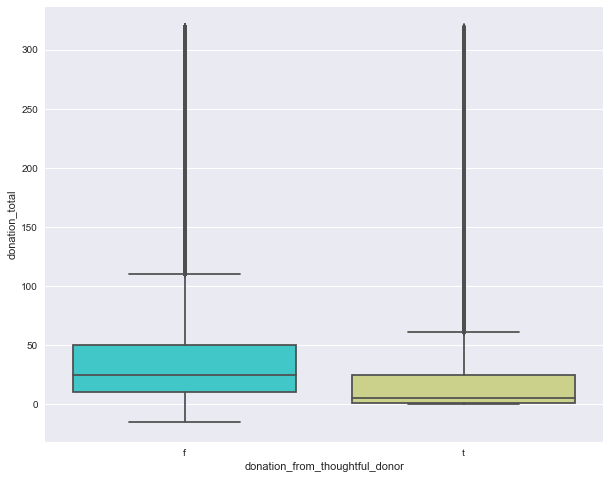

In [18]:
# Boxplots of total donations, disaggregated by categorical variables
explore2.make_boxplots(merged_df, 'donation_total', categ_col2, (10,8), .95)

### Correlation Matrix

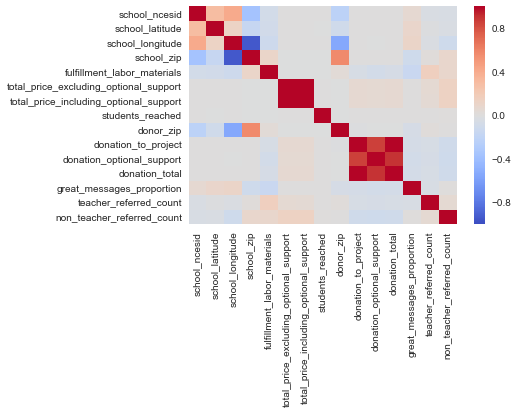

In [39]:
# Correlation heatmap of continuous variables
sns.heatmap(merged_df.corr(), cmap='coolwarm')

### Data Analysis / Narrative
The projects and the donations on the site are both mostly 'small-scale'. The projects request an average of about \$540 (\$410 median) to reach about 100 students on average (30 median). Donations are also small; the average donation is about \$75, while the median is about \$25. About two-thirds donate between \$10 - 100, about a fifth above \$100, and about a tenth lower than \$10. There are some outliers in project size (requesting \$10 million and reaching \$1 million students) and donations (over \$150k), but the vast majority of requests are for small projects to reach a few classrooms of students. Since most of the projects are small in scale, it is not surprising that a large proportion of the projects become fully funded. However, only a small proportion is deemed "exciting" in a business sense. "Exciting" projects elicit roughly the same amount of donations as 'non-exciting' ones, suggesting that the designation does not affect donation patterns very much. 

A natural question to ask is what drives people to donate larger amounts. Larger donations mean that projects need less donors and less time to become fully funded. Donation amounts, however, do not seem to be correlated with any continuous variables, whether positively or negatively, according to the correlation heatmap. Disaggregating donation amounts by the different values of categorical variables shows that they are not really related to school type (charter, magnet, etc.), location (urban, rural), gender of the teacher, subject area of the project, poverty level of the school, or grade level of the students. Further, simple eligibilty for double impact or home match also do not seem to impact donation amounts. 

However, there is great variablity in donation amounts among the different payment methods. Double impact and home match, both cases where external partners match a donation, clearly have larger average donation amounts than the other payment methods (the middle half in the \$150-250 range). Another payment method that has a larger average amount is checks (\$50-200 middle range). The middle half of Paypal, Amazon, and credit card donations are within the \$10 - 60 range. This may reflect people's spending patterns in the payment medium itself; a small donation is like a purchase through a credit card, while a check requires more careful consideration.   

A takeaway from the data analysis is that involving external partners clearly "boosts" donations. Eligibility for these matching funds does not seem to impact the original donation amount very much, but the matching boosts the donation significantly. These external partners should be engaged as much as possible. Also, different methods should be used to target those who are likely to pay by a paper-less method and those likely to pay by check, as they clearly show different spending patterns.  


### Data Questions
An aspect of the data that is missing is the 'time' component. A project start date and donation timestamps exist in the data, but not much else indicates how long a project lasts or what donations are like at different stages. An interesting question to ask is what does the life-cycle of an average project look like? Does most of the funding come when a project is new or almost fully funded? Do the donation amounts differ in these different states? If most of the funding comes when a project is almost fully funded, how long does it take to get there? Simply adding a project end date and creating different 'states' (new, almost-funded, etc. -- categories that exist in the website) in the donations data could yield interesting insights to help projects garner more funding.

## 2. Machine Learning Modeling

Purpose: to predict whether a project on DonorsChoose.org will be 'fully_funded' or not (binary outcome). 

For this exercise, a simplified version of the machine learning process/pipeline will be used just for the purposes of demonstration. Several key features will be selected (based on some of the findings above) to be modeled by several key supervised machine learning algorithms. The best classifier will be selected based on evaluation criteria.

### Preprocessing

In [ ]:
# X variables to use
x_vars = ['fully_funded','primary_focus_area','resource_type','poverty_level','grade_level','eligible_double_your_impact_match', \
          'eligible_almost_home_match','great_chat','great_messages_proportion','teacher_referred_count','non_teacher_referred_count']

# Use only project-outcomes merged data
data = merged[x_vars] 

In [97]:
# Check nulls
data.isnull().sum()

fully_funded                          44772
primary_focus_area                       39
resource_type                            45
poverty_level                             0
grade_level                               9
eligible_double_your_impact_match         0
eligible_almost_home_match                0
great_chat                            44772
great_messages_proportion            224611
teacher_referred_count               139170
non_teacher_referred_count           139170
dtype: int64

In [119]:
# drop some observations (not many or cannot impute)
data.dropna(subset=['fully_funded','primary_focus_area','resource_type','grade_level'],inplace=True) 

# fill some nulls (based on what makes sense)
data['great_chat'].fillna('f', inplace=True)
data = preprocess2.fill_nulls(data,'great_messages_proportion','median')
data = preprocess2.fill_nulls(data,'teacher_referred_count','mode')
data = preprocess2.fill_nulls(data,'non_teacher_referred_count','mode')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Ana

In [101]:
data.isnull().sum()

fully_funded                         0
primary_focus_area                   0
resource_type                        0
poverty_level                        0
grade_level                          0
eligible_double_your_impact_match    0
eligible_almost_home_match           0
great_chat                           0
great_messages_proportion            0
teacher_referred_count               0
non_teacher_referred_count           0
dtype: int64

### Creating dummies

In [121]:
# Change some of the category values before changing into dummies
mask1 = data['eligible_double_your_impact_match'] == 't'  
mask2 = data['eligible_almost_home_match'] == 't' 
mask3 = data['great_chat'] == 't' 

data.loc[mask1, 'eligible_double_your_impact_match'] = 'Double_Imp_Elg'
data.loc[mask2, 'eligible_almost_home_match'] = 'Home_Match_Elg'
data.loc[mask3, 'great_chat'] = 'Great_Chat'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [122]:
# Create dummies from categorical variables
ml_data = preprocess2.add_dummy(data, ['fully_funded','primary_focus_area','resource_type','poverty_level','grade_level',\
                           'eligible_double_your_impact_match', 'eligible_almost_home_match','great_chat'],\
                    drop_original=True)

In [126]:
ml_data.drop('f', axis=1, inplace=True)
ml_data.rename(columns={'t':'fully_funded'}, inplace=True)

In [127]:
ml_data.head(3)

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count,fully_funded,Applied Learning,Health & Sports,History & Civics,Literacy & Language,Math & Science,Music & The Arts,Special Needs,Books,Other,Supplies,Technology,Trips,Visitors,high poverty,highest poverty,low poverty,moderate poverty,Grades 3-5,Grades 6-8,Grades 9-12,Grades PreK-2,Double_Imp_Elg,Home_Match_Elg,Great_Chat
44772,80.0,0.0,6.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
44773,50.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
44774,50.0,0.0,2.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


### Build Classifiers

In [4]:
# Split X and y
X = ml_data.drop('fully_funded', 1)
y = ml_data['fully_funded']

In [5]:
# Test run specifications (models that take too long to run were left out)
clfs, grid = classify2.define_clfs_params('tiny')
models_to_run = ['LR', 'NB', 'DT', 'RF'] 

LR_Non-standardized


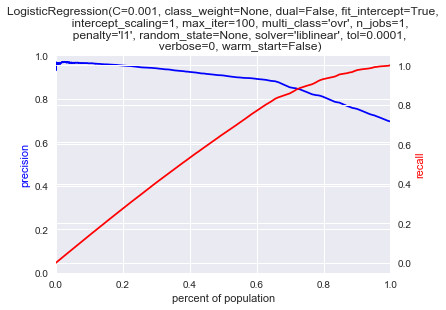

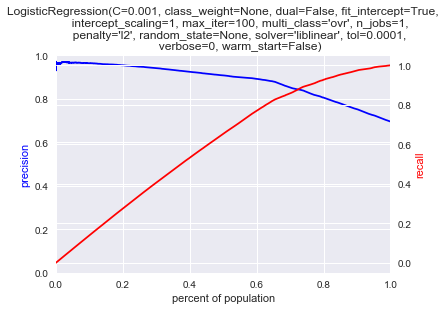

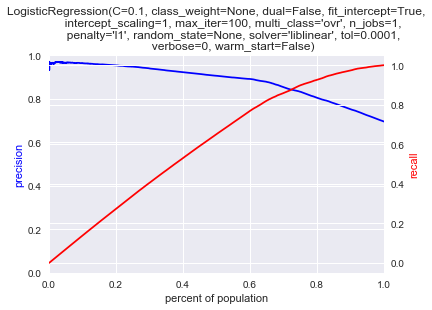

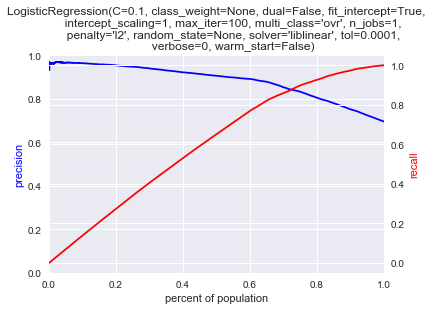

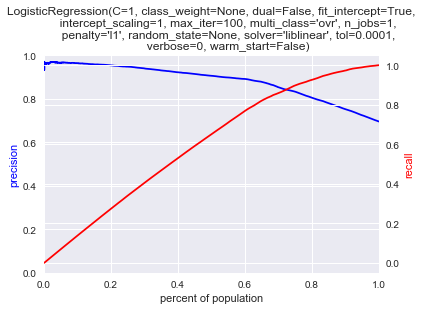

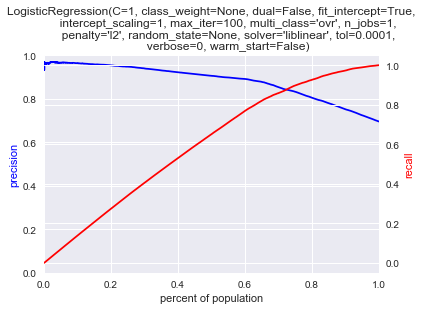

NB_Non-standardized


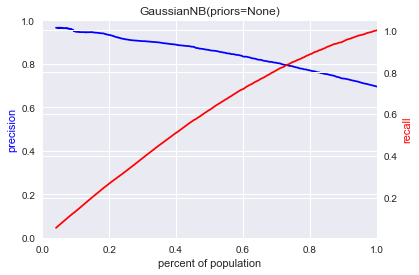

DT_Non-standardized


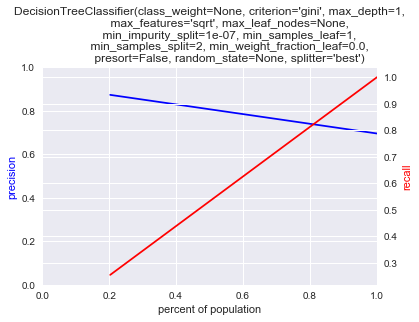

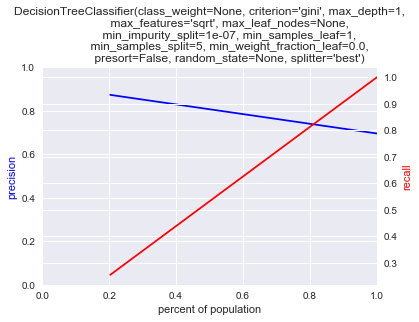

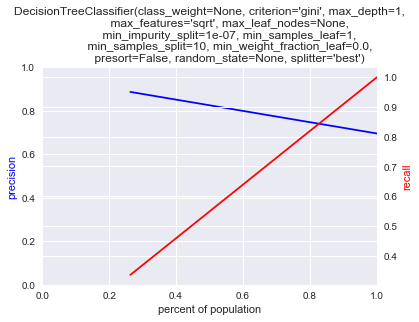

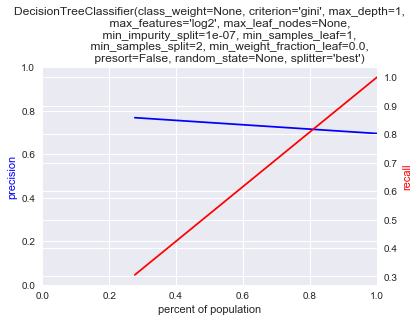

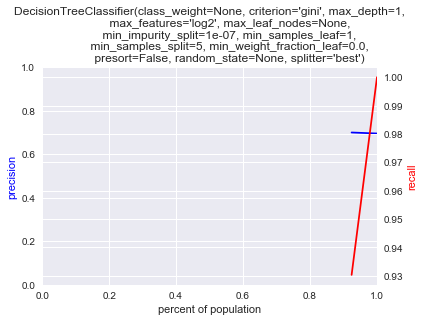

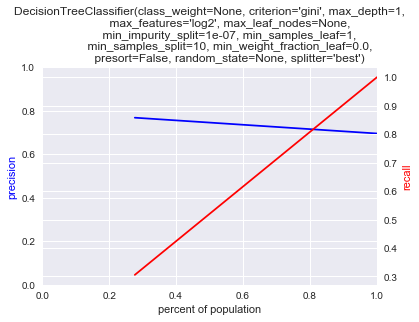

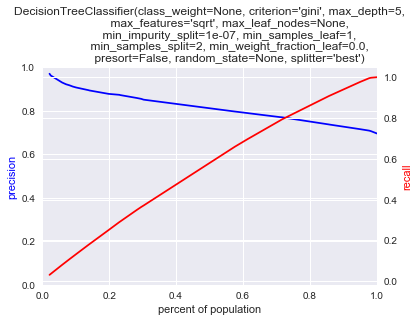

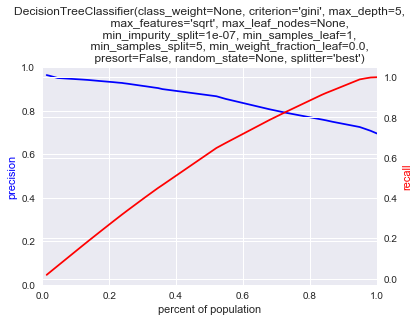

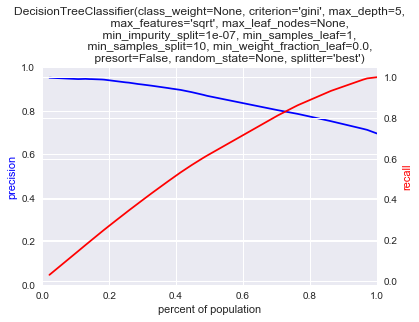

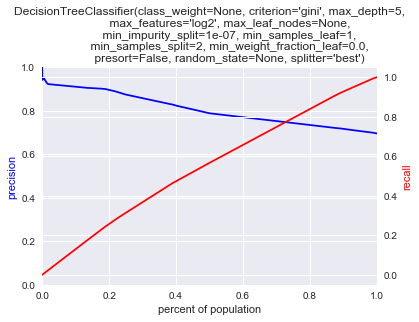

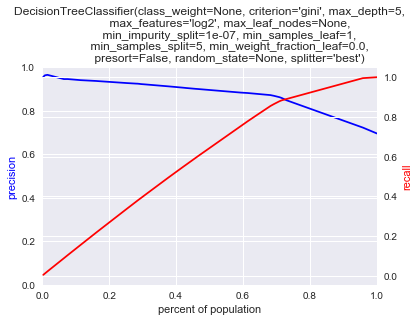

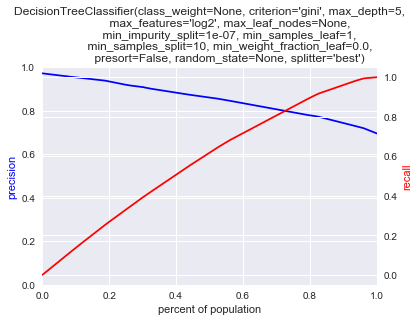

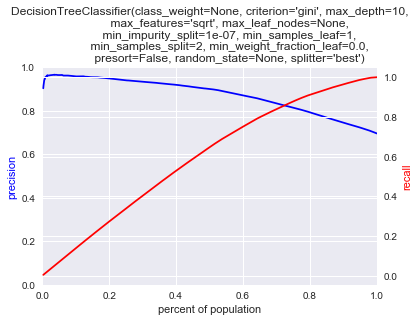

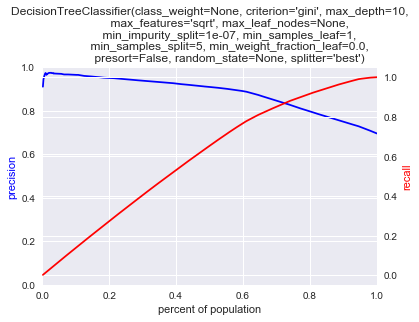

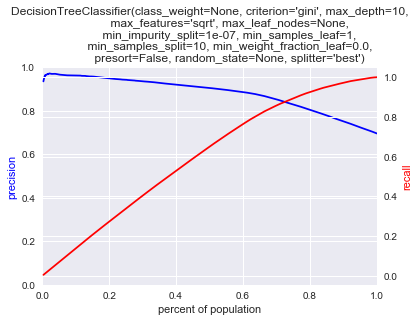

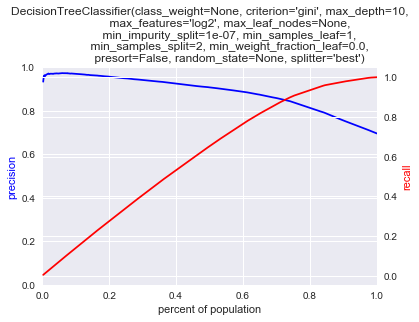

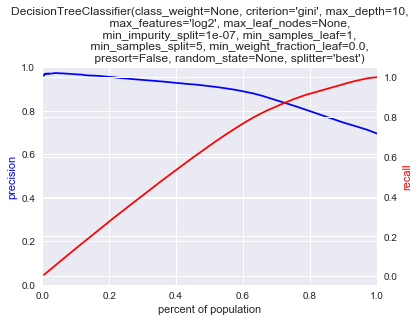

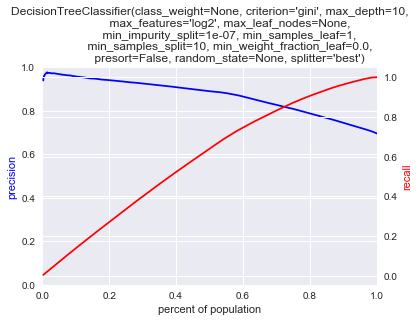

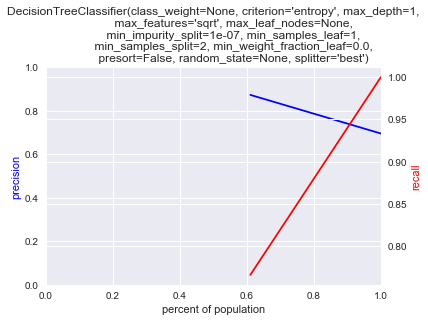

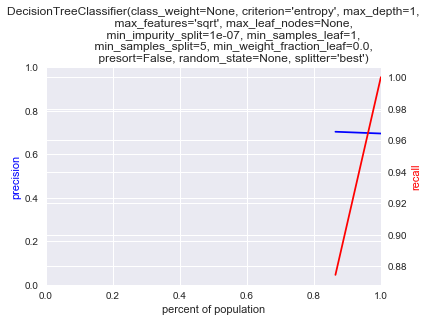

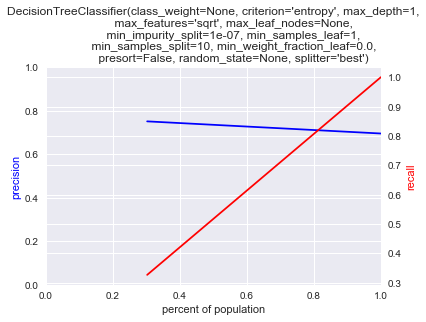

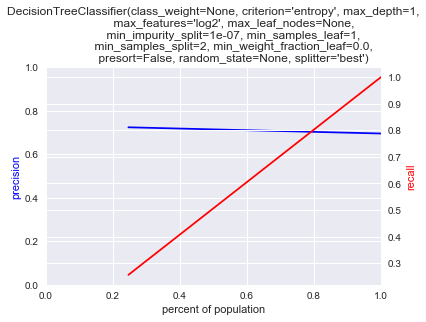

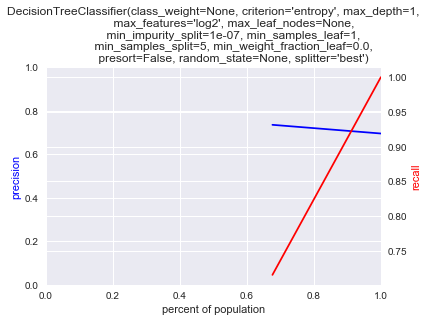

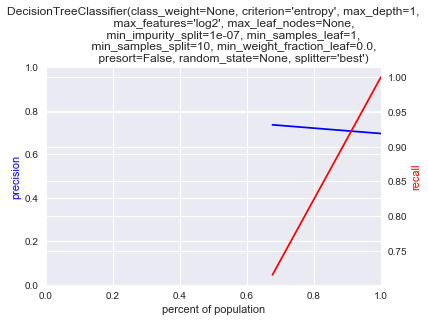

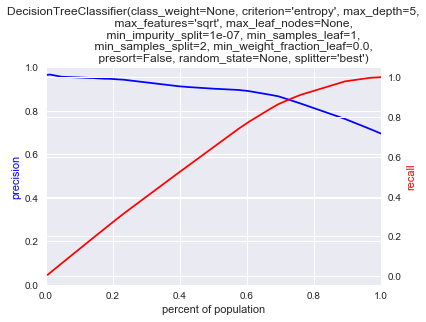

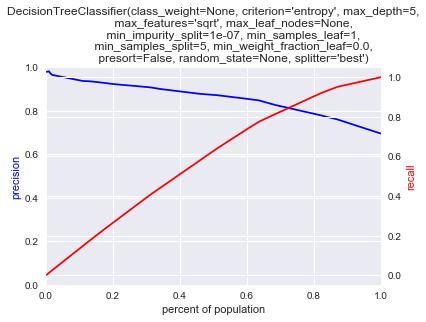

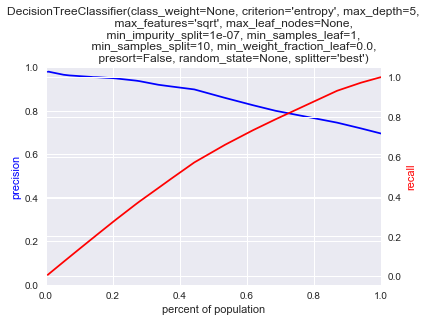

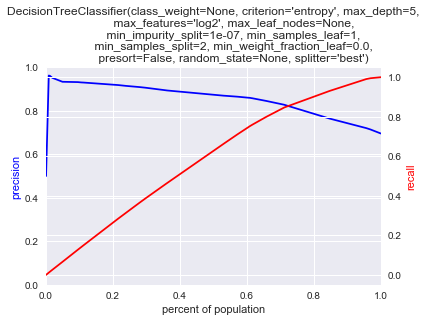

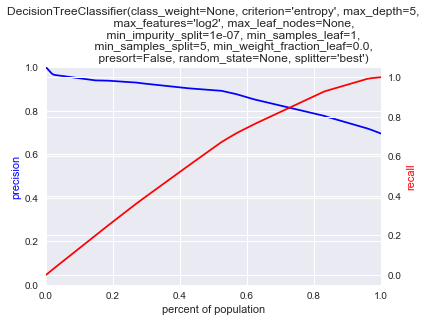

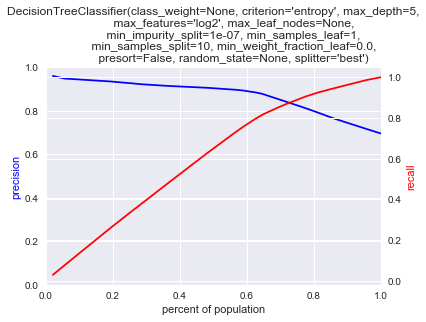

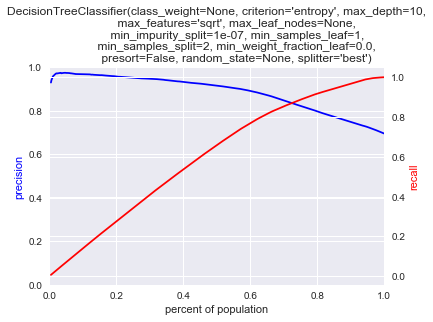

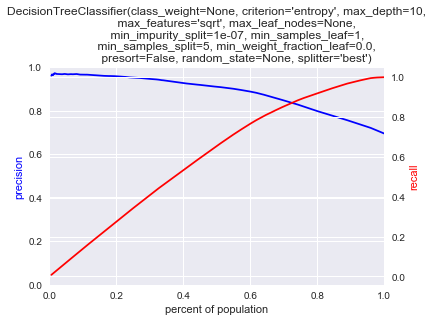

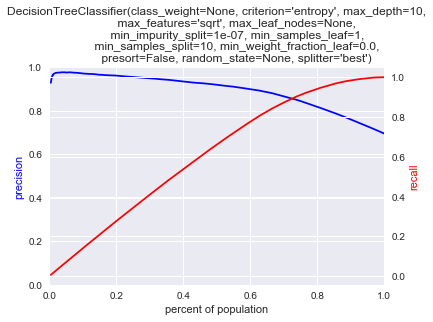

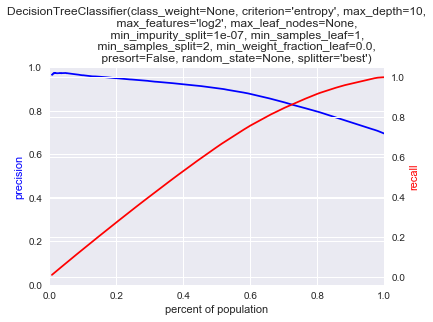

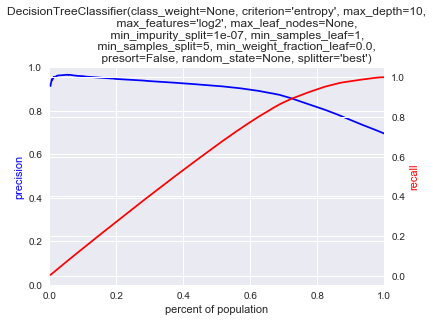

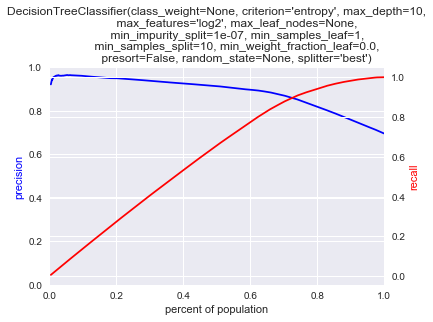

RF_Non-standardized


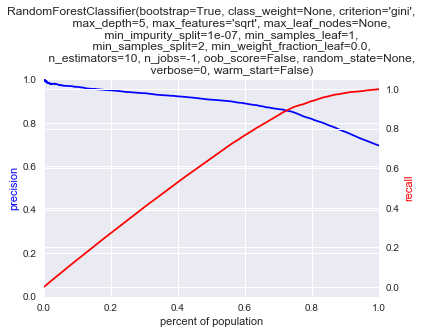

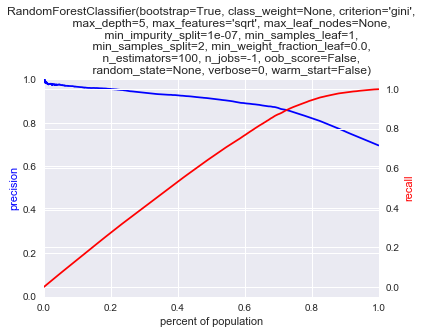

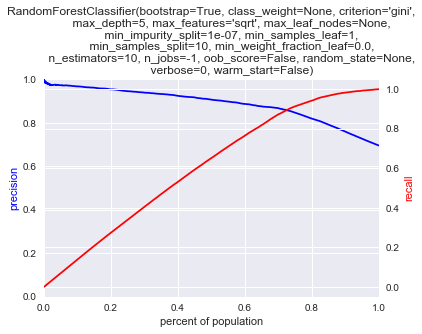

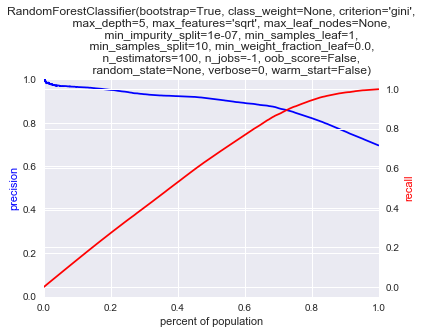

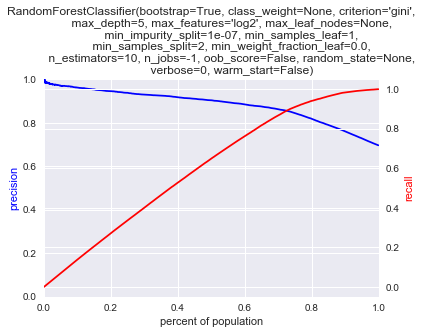

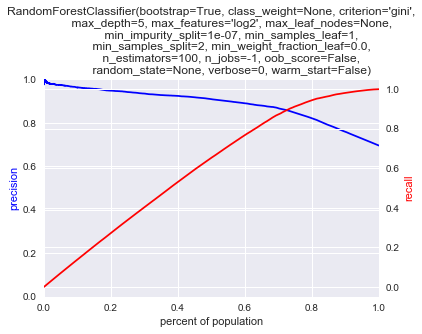

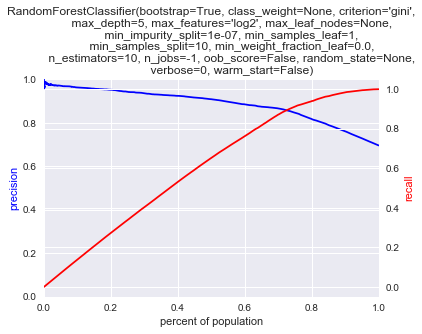

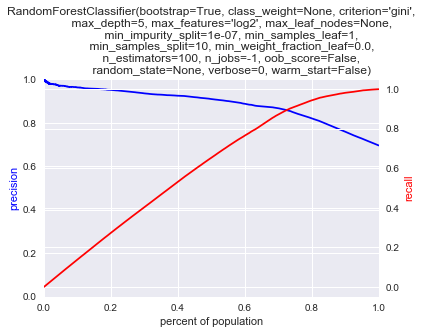

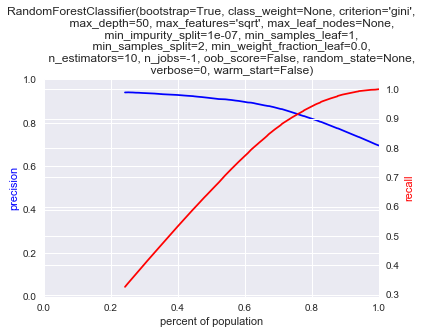

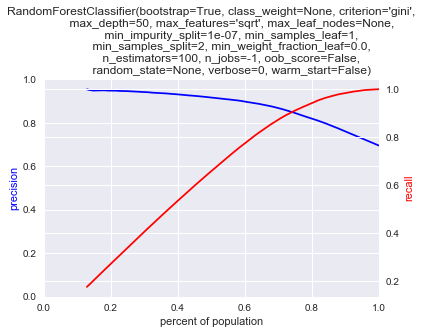

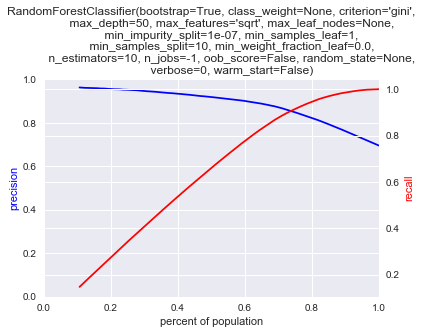

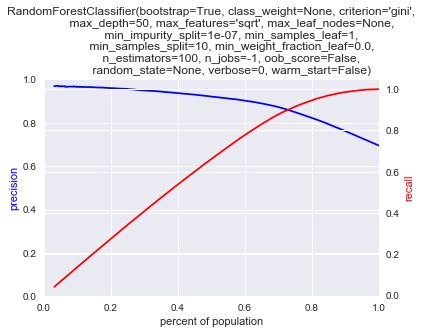

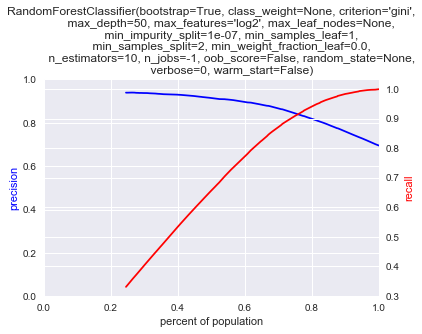

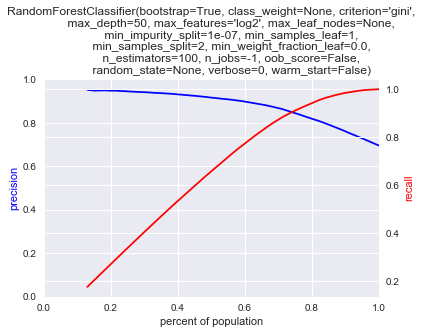

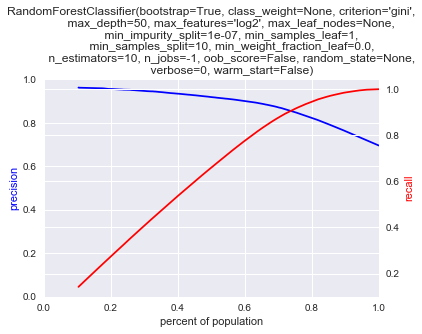

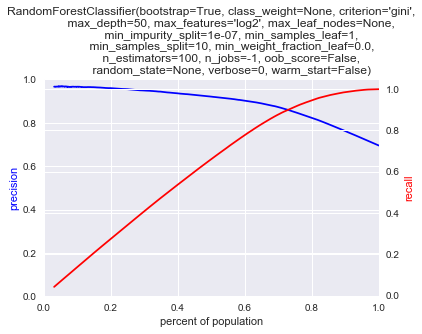

Took  1283.359364748001  seconds to run models


In [6]:
# Run models
# Produces precision and recall graphs
# Results in a table with each classifier's rates (accuracy, precision, recall, etc.)
tiny_grid_mod = classify2.run_models(models_to_run, clfs, grid, X, y, 0.2,['Non-standardized'])

### Evaluate Models

In [8]:
# Check evaluation table
tiny_grid_mod.head()

,Model,Classifier,Parameters,AUC-ROC,Accuracy,Prec@5,Prec@10,Prec@20,Rec@5,Rec@10,Rec@20,F@5,F@10,F@20
0,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.001, 'penalty': 'l1'}",0.842383,0.804547,0.965278,0.963262,0.952808,0.069378,0.138478,0.273961,0.129452,0.242145,0.425560
1,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.001, 'penalty': 'l2'}",0.841636,0.804135,0.966085,0.963827,0.954100,0.069436,0.138559,0.274332,0.129560,0.242287,0.426137
2,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l1'}",0.841353,0.801366,0.965924,0.964069,0.953817,0.069425,0.138594,0.274251,0.129539,0.242348,0.426011
3,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 0.1, 'penalty': 'l2'}",0.841310,0.801463,0.965924,0.964069,0.953736,0.069425,0.138594,0.274228,0.129539,0.242348,0.425975
4,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l1'}",0.841316,0.801463,0.965924,0.964069,0.953736,0.069425,0.138594,0.274228,0.129539,0.242348,0.425975


In [19]:
# Find the best classifier by model - recall at 10%
recall_tiny_grid = classify2.find_best_classifier_by_model(tiny_grid_mod, 'Rec@10')
recall_tiny_grid.head()

,Model,Classifier,Parameters,AUC-ROC,Accuracy,Prec@5,Prec@10,Prec@20,Rec@5,Rec@10,Rec@20,F@5,F@10,F@20
5,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.841307,0.801479,0.965924,0.964150,0.953777,0.069425,0.138605,0.274239,0.129539,0.242368,0.425993
5,LR_Non-standardized,"LogisticRegression(C=1, class_weight=None, dua...","{'C': 1, 'penalty': 'l2'}",0.841307,0.801479,0.965924,0.964150,0.953777,0.069425,0.138605,0.274239,0.129539,0.242368,0.425993
6,NB_Non-standardized,GaussianNB(priors=None),{},0.761588,0.614560,0.965601,0.948163,0.932663,0.069401,0.136307,0.268169,0.129495,0.238349,0.416563
7,DT_Non-standardized,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.585243,0.695574,1.000000,1.000000,0.887086,0.071874,0.143759,0.255064,0.134109,0.251380,0.396206
8,DT_Non-standardized,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.585243,0.695574,1.000000,1.000000,0.887086,0.071874,0.143759,0.255064,0.134109,0.251380,0.396206


### Insights from ML algorithms

The table shows the classifiers with the highest recall at 10% per machine learning model. Here, we assume the 'recall' of the classifier is the most important to the project. That is, the ability to detect projects that will become fully-funded is most important, rather than the rate at which the algorithm predicts correctly (accuracy) or enhancing the proportion of positive predictions (fully funded) that is true (precision). The numbers show that in general recall is very low and precision is very high. This is not surprising because most of the projects do become fully funded, so it is difficult to predict/find the extra project that will become fully funded (leading to low recall) and it is easy to just predict that all the projects will become fully funded (leading to high precision). 

The different models don't show much difference in terms of recall, indicating that it is very difficult to further detect the projects that will become fully-funded given the data that we have. A more extensive machine learning study with all possible features, their variations, and other features generated from those features, in addition to a more diverse array of models, may help detect the marginal project that probably would become fully-funded. However, my sense is that different kinds of data may need to be collected or generated (whether a project is designated as almost-funded, for example) for the algorithms to yield good insights. In addition, it may be more interesting to predict which projects don't become fully-funded, so that project proposals can be guided against doing certain things that are likely to fail.
